In [1]:
from PIL import Image
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
im = Image.open('averageout.tif')
imarray = np.array(im)

In [3]:
imarray.shape

(1630, 7707)

In [19]:
im.show()

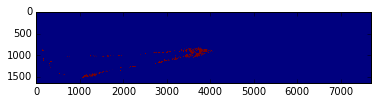

In [3]:
plt.imshow(imarray)
plt.show()

In [29]:
pixels_x = []
pixels_y = []
pixels = []

y = 1630

for i in imarray:
    x = 0
    for j in i:
        if j > 0:
            pixels_x.append(x)
            pixels_y.append(y)
            pixels.append([x, y])
        x += 1
    y -= 1

In [42]:
kmeans = KMeans(n_clusters=50)
kmeans.fit(pixels)
y_kmeans = kmeans.predict(pixels)
centers = kmeans.cluster_centers_

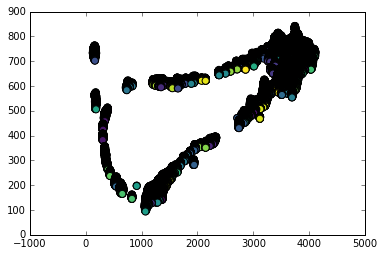

In [49]:
plt.scatter(pixels_x, pixels_y, c=y_kmeans, s=50, cmap='viridis')

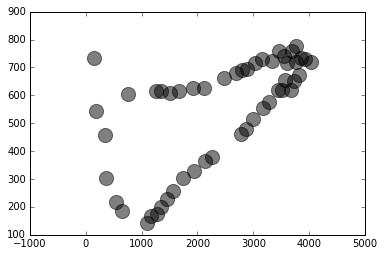

In [44]:
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [46]:
centers[0]

array([ 3920.55234657,   729.35451264])

In [50]:
centers.shape

(50, 2)

In [51]:
import csv

In [52]:
# export centroid coords
with open('kmeans_centroids.csv', mode='w') as f:
    writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for i in centers:
        writer.writerow(i)

In [54]:
# gaussian mixture model

from sklearn.mixture import GMM

from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covars_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

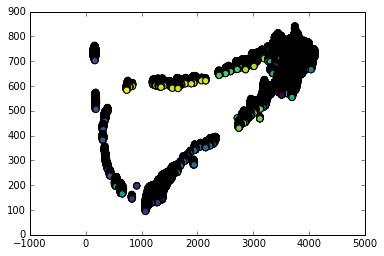

In [56]:
#gmm = GMM(n_components=50, covariance_type='full')
#plot_gmm(gmm, pixels, label=False)

gmm = GMM(n_components=16).fit(pixels)
labels = gmm.predict(pixels)
plt.scatter(pixels_x, pixels_y, c=labels, s=40, cmap='viridis');

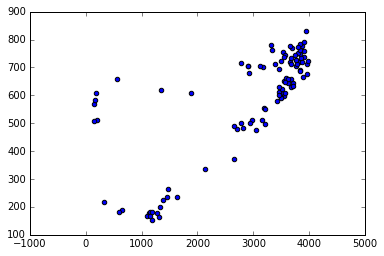

In [66]:
Xnew = gmm.sample(100)
plt.scatter(Xnew[:, 0], Xnew[:, 1]);